In [54]:
import re
import matplotlib.pyplot as plt
import numpy as np


In [55]:
class ReportStats:
    def __init__(self, total_time, average_time, variance, std_deviation, percentiles):
        self.total_time = total_time
        self.average_time = average_time
        self.variance = variance
        self.std_deviation = std_deviation
        self.percentiles = percentiles

    @classmethod
    def from_report(cls, report):
        total_time = float(re.findall("Total time taken: ([\d\.]+) seconds", report)[0])
        average_time = float(re.findall("Average time taken: ([\d\.]+) seconds", report)[0])
        variance = float(re.findall("Variance: ([\d\.]+)", report)[0])
        std_deviation = float(re.findall("Standard deviation: ([\d\.]+)", report)[0])
        percentiles = re.findall("(\d+)th percentile: ([\d\.]+) seconds", report)
        percentiles = [(int(p), float(t)) for p, t in percentiles]
        return cls(total_time, average_time, variance, std_deviation, percentiles)

In [56]:
def draw_plot(left_report_path, left_label, right_report_path, right_label, output_path, mult):
    with open(left_report_path, "r") as f:
        left_report = f.read()
    with open(right_report_path, "r") as f:
        right_report = f.read()
    # Extract the relevant information using regular expressions
    stats1 = ReportStats.from_report(left_report)
    stats2 = ReportStats.from_report(right_report)

    # Create a bar chart for the percentiles
    ind = np.arange(len(stats1.percentiles))  # the x locations for the groups
    width = 0.35       # the width of the bars
    percentile_labels = [f"{p}th" for p, _ in stats1.percentiles]
    percentile_values1 = [t / mult for _, t in stats1.percentiles]
    percentile_values2 = [t / mult for _, t in stats2.percentiles]

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.bar(ind, percentile_values1, width, color='royalblue', label=left_label)
    ax.bar(ind + width, percentile_values2, width, color='seagreen', label=right_label)
    ax.set_title("Percentiles")
    ax.set_xlabel("Percentile")
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels( percentile_labels )
    ax.set_ylabel("Time (s)")
    ax.legend()

    plt.savefig(output_path)

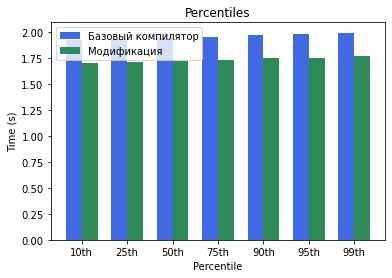

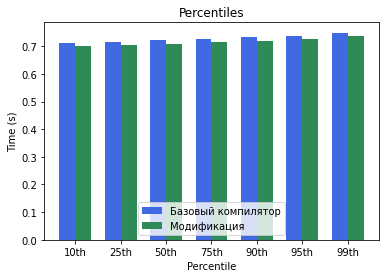

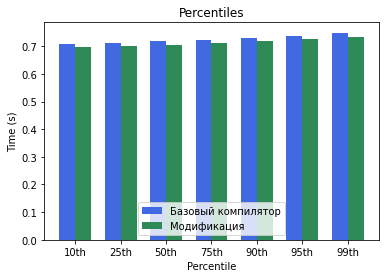

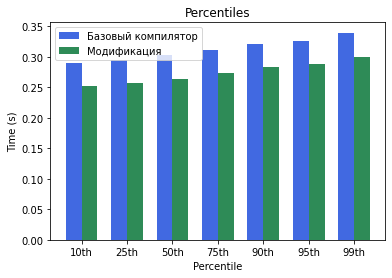

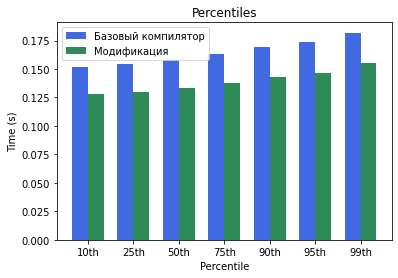

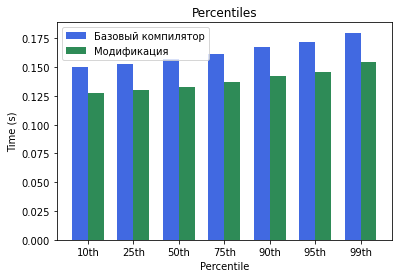

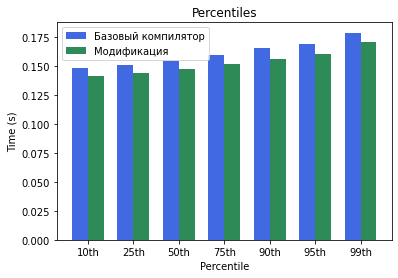

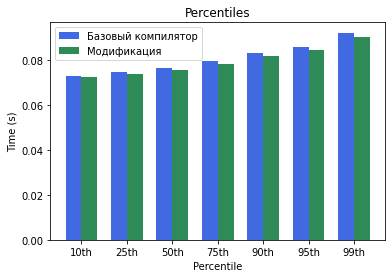

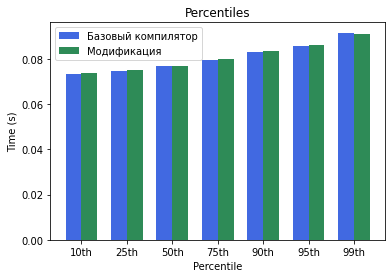

In [59]:
draw_plot("results/XML/2000/O0.BASE.txt", 'Базовый компилятор', "results/XML/2000/O0.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/XML.00.png', 1000000)
draw_plot("results/XML/2000/O2.BASE.txt", 'Базовый компилятор', "results/XML/2000/O2.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/XML.02.png', 1000000)
draw_plot("results/XML/2000/O3.BASE.txt", 'Базовый компилятор', "results/XML/2000/O3.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/XML.03.png', 1000000)

draw_plot("results/TREAP/2000/O0.BASE.txt", 'Базовый компилятор', "results/TREAP/2000/O0.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/TREAP.00.png', 1)
draw_plot("results/TREAP/2000/O2.BASE.txt", 'Базовый компилятор', "results/TREAP/2000/O2.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/TREAP.02.png', 1)
draw_plot("results/TREAP/2000/O3.BASE.txt", 'Базовый компилятор', "results/TREAP/2000/O3.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/TREAP.03.png', 1)

draw_plot("results/RBT/2000/O0.BASE.txt", 'Базовый компилятор', "results/RBT/2000/O0.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/RBT.00.png', 1)
draw_plot("results/RBT/2000/O2.BASE.txt", 'Базовый компилятор', "results/RBT/2000/O2.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/RBT.02.png', 1)
draw_plot("results/RBT/2000/O3.BASE.txt", 'Базовый компилятор', "results/RBT/2000/O3.OPT.txt", 'Модификация', 'bsse-latex-templates/slides/images/RBT.03.png', 1)